<a href="https://colab.research.google.com/github/nlan082/BAINHOM/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow==2.12.0

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import json
# Đường dẫn đến dữ liệu
data_dir = r'/content/drive/MyDrive/DATA_AI/AI_FINAL'
img_size = (224, 224)
batch_size = 8
num_classes = 10

# Tăng cường dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Tải dữ liệu
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Biên dịch mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# In tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

# Lưu mô hình
model.save('model.h5')

# Lưu class indices
import json
with open('class.json', 'w') as f:
    json.dump(train_generator.class_indices, f)


Found 470 images belonging to 10 classes.
Found 115 images belonging to 10 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                    

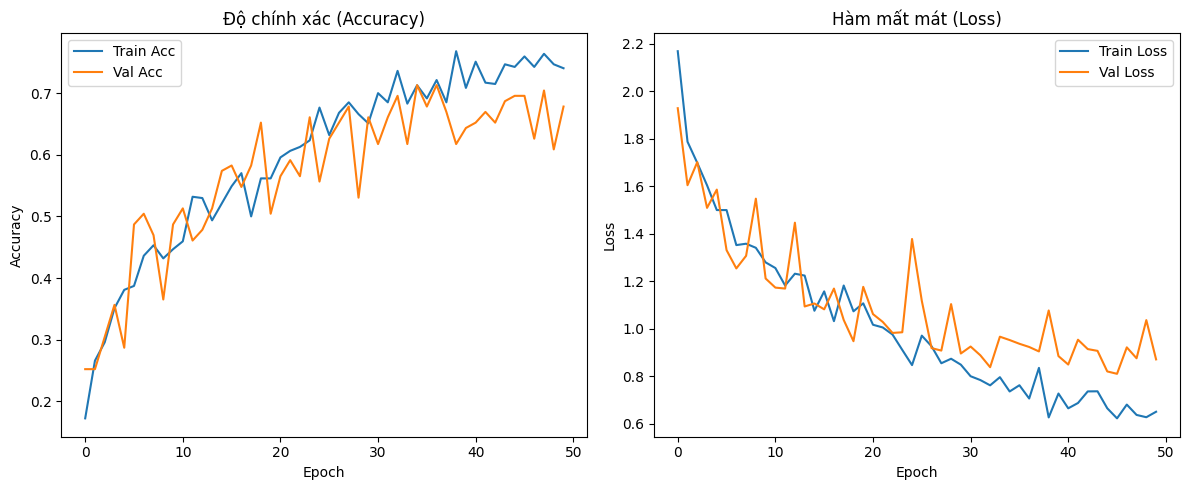

In [8]:
# Vẽ đồ thị accuracy và loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Độ chính xác (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Hàm mất mát (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
!pip install -q ultralytics tensorflow opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.7 MB/s eta 0:00:00


Tải lên các file: model.h5, class.json, best.pt


Tải ảnh cần xử lý


Saving test4.jpg to test4 (1).jpg
Đang xử lý ảnh: test4 (1).jpg

0: 480x640 5 foods, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


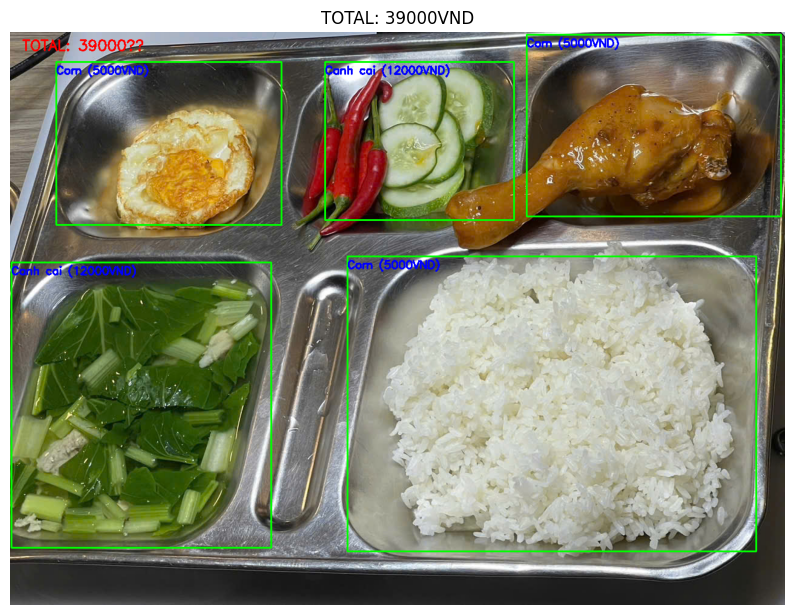

TOTAL: 39000VND


In [15]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
from ultralytics import YOLO
from google.colab import files
from IPython.display import display, Image as IPyImage

#Upload các file cần thiết
print("Tải lên các file: model.h5, class.json, best.pt")
uploaded = files.upload()

#Load model
cnn_model = load_model("model.h5")
yolo_model = YOLO("best.pt")

#Load label map
with open("class.json", "r") as f:
    label_map = json.load(f)
inv_label_map = {v: k for k, v in label_map.items()}

#Đơn giá từng món
price_dict = {
    'Ca hu kho': 20000,
    'Canh cai': 12000,
    'Canh chua': 15000,
    'Com': 5000,
    'Dau hu sot ca': 18000,
    'Ga chien': 25000,
    'Rau muong xao': 10000,
    'Thit kho': 22000,
    'Thit kho trung': 25000,
    'Trung chien': 12000
}
IMG_SIZE = (224, 224)

#Hàm xử lý ảnh
def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = yolo_model(image_rgb)[0]
    total_price = 0

    for box in results.boxes.xyxy:
        try:
            x1, y1, x2, y2 = map(int, box)
            crop = image[y1:y2, x1:x2]
            crop_resized = cv2.resize(crop, IMG_SIZE) / 255.0
            crop_expanded = np.expand_dims(crop_resized, axis=0)

            pred = cnn_model.predict(crop_expanded, verbose=0)
            class_id = np.argmax(pred)
            food_name = inv_label_map.get(class_id, "Unknown")
            price = price_dict.get(food_name, 0)
            total_price += price

            #Vẽ khung
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{food_name} ({price}VND)", (x1, y1 + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        except Exception as e:
            print(f"Lỗi xử lý box: {e}")
            continue

    #Tổng tiền
    cv2.putText(image, f"TOTAL: {total_price}đ", (20, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    #Hiển thị ảnh kết quả
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"TOTAL: {total_price}VND")
    plt.show()

    return total_price

# Chọn ảnh và xử lý
print("Tải ảnh cần xử lý")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Đang xử lý ảnh:", image_path)
total = process_image(image_path)
print(f"TOTAL: {total}VND")


Tải lên các file: model.h5, class.json, best.pt


Tải ảnh cần xử lý


Saving test2.png to test2 (1).png
Đang xử lý ảnh: test2 (1).png

0: 448x640 5 foods, 7.0ms
Speed: 2.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


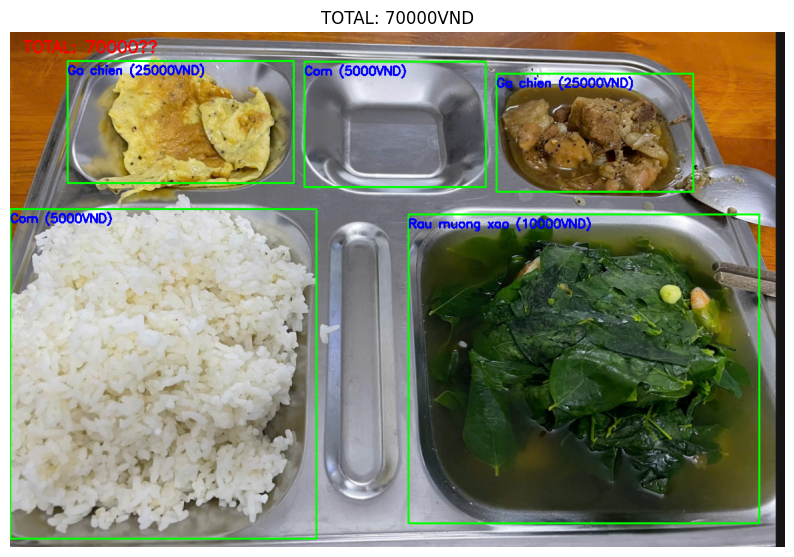

TOTAL: 70000VND


In [19]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
from ultralytics import YOLO
from google.colab import files
from IPython.display import display, Image as IPyImage

#Upload các file cần thiết
print("Tải lên các file: model.h5, class.json, best.pt")
uploaded = files.upload()

#Load model
cnn_model = load_model("model.h5")
yolo_model = YOLO("best.pt")

#Load label map
with open("class.json", "r") as f:
    label_map = json.load(f)
inv_label_map = {v: k for k, v in label_map.items()}

#Đơn giá từng món
price_dict = {
    'Ca hu kho': 20000,
    'Canh cai': 12000,
    'Canh chua': 15000,
    'Com': 5000,
    'Dau hu sot ca': 18000,
    'Ga chien': 25000,
    'Rau muong xao': 10000,
    'Thit kho': 22000,
    'Thit kho trung': 25000,
    'Trung chien': 12000
}
IMG_SIZE = (224, 224)

#Hàm xử lý ảnh
def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = yolo_model(image_rgb)[0]
    total_price = 0

    for box in results.boxes.xyxy:
        try:
            x1, y1, x2, y2 = map(int, box)
            crop = image[y1:y2, x1:x2]
            crop_resized = cv2.resize(crop, IMG_SIZE) / 255.0
            crop_expanded = np.expand_dims(crop_resized, axis=0)

            pred = cnn_model.predict(crop_expanded, verbose=0)
            class_id = np.argmax(pred)
            food_name = inv_label_map.get(class_id, "Unknown")
            price = price_dict.get(food_name, 0)
            total_price += price

            #Vẽ khung
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{food_name} ({price}VND)", (x1, y1 + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        except Exception as e:
            print(f"Lỗi xử lý box: {e}")
            continue

    #Tổng tiền
    cv2.putText(image, f"TOTAL: {total_price}đ", (20, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    #Hiển thị ảnh kết quả
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"TOTAL: {total_price}VND")
    plt.show()

    return total_price

# Chọn ảnh và xử lý
print("Tải ảnh cần xử lý")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Đang xử lý ảnh:", image_path)
total = process_image(image_path)
print(f"TOTAL: {total}VND")
